#### Question 5:Customer segmentation RFM analysis
#### Submitted by Apurva Nikade

#### Load the required libraries and read data from Online retail excel file

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [2]:
Retail_df = pd.read_excel("Online Retail.xlsx")

#### Convert the series invoice date data in datetime format and count the unique number of attributes

In [3]:
#Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
Retail_df['Date']=pd.to_datetime(Retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
#Retail_df['Date']=Retail_df['Date'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M'))

# Count the unique no of attributes in Retail data
def unique_counts(Retail_df):
   for i in Retail_df.columns:
       count = Retail_df[i].nunique()
       print(i, ": ", count)
unique_counts(Retail_df)


InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38
Date :  23260


#### Calculate Total Price by multiplying units and quantity and store that value in separate column Total_Price

In [4]:

Retail_df['Total_Price']=Retail_df['Quantity']*Retail_df['UnitPrice']
Retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08


#### Only consider rows without NaN values and store the data in dataset Online_retail_df

In [5]:

Online_retail_df = Retail_df[np.isfinite(Retail_df['CustomerID'])]


#### Count the unique no of attributes in Retail data

In [6]:

unique_counts(Online_retail_df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
Date :  20460
Total_Price :  4041


In [7]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = Online_retail_df[Online_retail_df['Quantity'] > 0]

In [8]:
final_retail.shape

(397924, 10)

In [9]:
unique_counts(final_retail)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37
Date :  17286
Total_Price :  2940


In [10]:
type(final_retail['Date'].max())

pandas._libs.tslib.Timestamp

In [11]:
final_retail['Date'].min()

Timestamp('2010-12-01 08:26:00')

### Q5.a ) Calculate RFM value of each customer
#### Assumption: In this final dataset , I have removed all the transaction with negative quantity value

In [12]:
#Calculate recency and frequency
import datetime as dt
NOW = dt.datetime(2011,12,10)


In [13]:
rfmTable = final_retail.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [14]:
#rfmTable = pd.merge(mTable, rfTable, on="CustomerID",how = 'inner')
rfmTable.shape


(4339, 3)

In [15]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


### Q35.b) Fing top 10 customers based on frequency and monetary values
#### Sorting first on frequency and then on Monetary value

In [16]:
rfmTable.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)

#### Below are top ten customers after sorting

In [17]:

rfmTable.head(10)


,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


### Q5.c)Find optimal number of segments usig dendograms and elbow methods

#### Seggregate the brands into 3 segments

### Normalising the features

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [23]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
import random
random.seed(9008)
X_sample = np.array(random.sample(X_scaled.tolist(),20))
#type(X_scaled)

In [25]:
rfmTable["cluster_new"] = clusters.labels_

In [26]:
rfmTable
type(X_scaled)

numpy.ndarray

In [27]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value
cluster_new,,,
0,40.898644,103.079174,2028.480799
1,246.813889,27.750926,636.501112
2,4.000000,2566.000000,126118.310000


In [28]:
#Dendogram built with random samples from X_scaled

In [29]:
rfmTable.drop( 'cluster_new', axis = 1, inplace = True )

c:\users\harish\anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


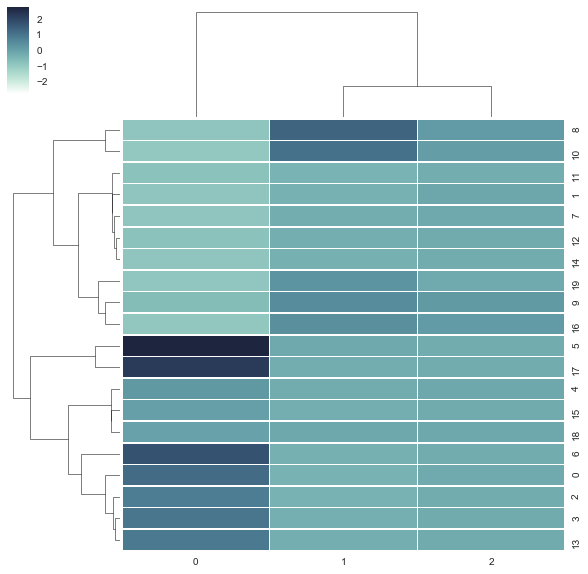

In [30]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)


c:\users\harish\anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


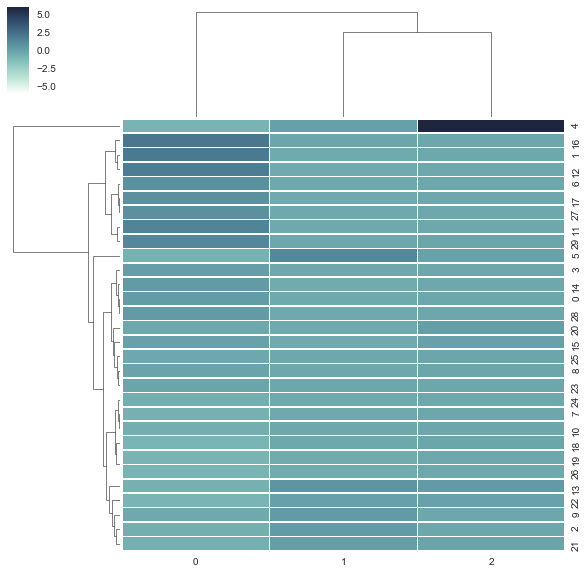

In [31]:
#Lets take one more sample to validate dendogram
random.seed(9005)
X_sample = np.array(random.sample(X_scaled.tolist(),30))
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

### The dendogram shows there are 3-6 disctinct clusters.
###  I have taken a random sample of 20-30 data points to build dendogram

### Consider Elbow method to verify the cluster segmentation

In [48]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [49]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [50]:

clusters_df.head(10)

,cluster_errors,num_clusters
0,13017.000000,1
1,8996.762762,2
2,5453.122485,3
3,4006.917343,4
4,2958.365578,5
5,2371.441752,6
6,1923.447421,7
7,1674.501637,8
8,1494.325530,9


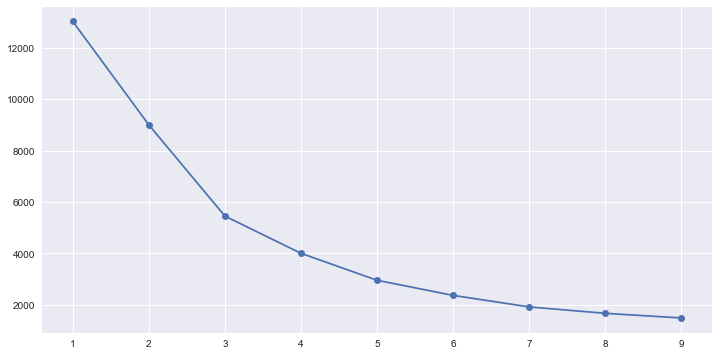

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [52]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
rfmTable["cluster_label"] = clusters.labels_

In [53]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,246.813889,27.750926,636.501112
1,40.898644,103.079174,2028.480799
2,4.000000,2566.000000,126118.310000


In [54]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]

In [55]:
rfmTable_0.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17850.0,372,297,5391.21,0
15644.0,166,238,813.00,0
14573.0,179,235,1653.42,0
15808.0,306,208,3734.97,0
15379.0,169,194,3703.29,0
17341.0,156,183,781.36,0
17472.0,191,181,710.29,0
14669.0,241,170,1269.99,0
15574.0,177,168,702.25,0


### All the customers with high recency and low frequency and low monetary value are segmented in this cluster.These are the least profitable customers for the company.

In [56]:
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14606.0,1,2700,12156.65,1
13263.0,1,1677,7454.07,1
14298.0,8,1637,51527.30,1
15039.0,9,1502,19914.44,1
18118.0,10,1279,5653.82,1
14159.0,19,1204,4693.01,1
14796.0,1,1141,8022.49,1
16033.0,5,1137,8816.40,1
15005.0,15,1119,6316.57,1


#### Each customer is assigned with the cluster label.
#### This cluster has customers that are potential customers with decent frequency and monetary value.Company should work towards them to convert them to most profitable customers

In [57]:
rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,2
14911.0,1,5677,143825.06,2
14096.0,4,5111,65164.79,2
12748.0,0,4596,33719.73,2
15311.0,0,2379,60767.90,2
14646.0,1,2080,280206.02,2
13089.0,2,1818,58825.83,2
14156.0,9,1400,117379.63,2
17511.0,2,963,91062.38,2


#### Each customer is assigned with the cluster label.
#### All the customers with low recency and high frequency and and monetary value are segmented in this Cluster .These are the most profitable and highly valued customers company should look at.


In [58]:
rfmTable_0.mean()

recency           246.813889
frequency          27.750926
monetary_value    636.501112
cluster_label       0.000000
dtype: float64

In [59]:
rfmTable_1.mean()

recency             40.898644
frequency          103.079174
monetary_value    2028.480799
cluster_label        1.000000
dtype: float64

In [60]:
rfmTable_2.mean()

recency                4.00
frequency           2566.00
monetary_value    126118.31
cluster_label          2.00
dtype: float64

In [61]:
clusters = KMeans(3)  # 5 clusters
clusters.fit( X_scaled )


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
rfmTable.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,2
14911.0,1,5677,143825.06,2
14096.0,4,5111,65164.79,2
12748.0,0,4596,33719.73,2
14606.0,1,2700,12156.65,1
15311.0,0,2379,60767.90,2
14646.0,1,2080,280206.02,2
13089.0,2,1818,58825.83,2
13263.0,1,1677,7454.07,1


In [63]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,246.813889,27.750926,636.501112
1,40.898644,103.079174,2028.480799
2,4.000000,2566.000000,126118.310000
